# constructing 2D/3D local box using GeoPoints.jl and getTopo.jl (make_2Dtable_From1DEarthModels.ipynb is the source of reflexion)

Nobuaki Fuji October 2025

In [1]:
using Pkg


cd(@__DIR__)
Pkg.activate("../..")
ParamFile = "../test/testparam.csv"


include("../src/batchDrWatson.jl")
include("../src/DSM1D.jl")
include("../src/GeoPoints.jl")
include("../src/getSeismicParamTopo.jl")
using .DSM1D

  Activating 

  1.968595 seconds (4.58 M allocations: 211.457 MiB, 1.30% gc time, 99.93% compilation time)


project at `~/Documents/Github/flexibleDSM`


In [2]:
set_default_planet!(:Earth) # if you wish to go to other telluric bodies, otherwise this is not necessary

Ellipsoid(Earth)

In [3]:
# two (extreme) points that can define the slice (or the x-y local plane for 3D box)
p1 = GeoPoint(-18.21,178.48) # Fiji
p2 = GeoPoint(35.36,138.72) # Mt Fuji


Δx = 300.0 # in metre
Δz = 300.0

altMax = 30.e3 # in metre
altMin = -500.e3 # in metre

-500000.0

In [4]:
# make a box/rectangle

allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δz,altMin,altMax)


(GeoPoint[GeoPoint(-20.34264463055879, -179.93089420077087, -414534.57360198215, [-5.5940717283443315e6, -6747.145923771546, -2.0591969571487366e6], 5.961038175869206e6) GeoPoint(-20.341280803396046, -179.93192701011753, -414289.79735715216, [-5.5943504170643855e6, -6646.638579028891, -2.0591497250519404e6], 5.961283281047324e6) … GeoPoint(-18.092493211709865, 178.39386531058247, 24840.300737732694, [-6.085957319238592e6, 170648.3175470551, -1.9758323063033356e6], 6.400930451309981e6) GeoPoint(-18.091302734132224, 178.3929933852746, 25093.117841772153, [-6.086236007958645e6, 170748.82489179776, -1.9757850742065392e6], 6.401183528475937e6); GeoPoint(-20.340723856235712, -179.93235766568375, -414708.02075073187, [-5.593978356426046e6, -6604.150133838673, -2.0589503118792968e6], 5.960865193388448e6) GeoPoint(-20.339360059505395, -179.93339041942593, -414463.237360125, [-5.594257045146099e6, -6503.642789095989, -2.0589030797825004e6], 5.961110305679149e6) … GeoPoint(-18.090632838949265, 17

In [5]:
allGridsInCartesian[20,30]

localCoord2D(Integer[20, 30], [5700.0, -491300.0], [0.8179429675986433, 0.5752993149273908], [-0.5752993149273907, 0.817942967598643])

In [6]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,2.0)

┌ Info: File /Users/nobuaki/Documents/Github/flexibleDSM/data/topoViaGMT/topoViaGMT_bfa61dcc.jld2 does not exist. Producing it now...
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:106
┌ Warning: The Git repository ('/Users/nobuaki/Documents/Github/flexibleDSM') is dirty! Appending -dirty to the commit ID.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_tools.jl:71
┌ Info: File /Users/nobuaki/Documents/Github/flexibleDSM/data/topoViaGMT/topoViaGMT_bfa61dcc.jld2 saved.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:115


(ρ = [3.7416898439649526 3.741381531216853 … 0.0 0.0; 3.74190825589274 3.741599934158676 … 0.0 0.0; … ; 3.735791872934051 3.735483424198465 … 0.0 0.0; 3.735573106775443 3.735264667003583 … 0.0 0.0], Vpv = [9.206799843665754 9.205547494469055 … 0.0 0.0; 9.20768702074163 9.206434635044445 … 0.0 0.0; … ; 9.18284261410506 9.181589712534766 … 0.0 0.0; 9.181953998163333 9.180701133003197 … 0.0 0.0], Vph = [9.206799843665754 9.205547494469055 … 0.0 0.0; 9.20768702074163 9.206434635044445 … 0.0 0.0; … ; 9.18284261410506 9.181589712534766 … 0.0 0.0; 9.181953998163333 9.180701133003197 … 0.0 0.0], Vsv = [4.974017769308702 4.973304155344334 … 0.0 0.0; 4.974523300794552 4.9738096660314675 … 0.0 0.0; … ; 4.960366454158646 4.959652525440607 … 0.0 0.0; 4.959860102777861 4.959146194807067 … 0.0 0.0], Vsh = [4.974017769308702 4.973304155344334 … 0.0 0.0; 4.974523300794552 4.9738096660314675 … 0.0 0.0; … ; 4.960366454158646 4.959652525440607 … 0.0 0.0; 4.959860102777861 4.959146194807067 … 0.0 0.0], Qμ 

In [7]:
Nx,Nz=size(allGridsInCartesian)

(22916, 1767)

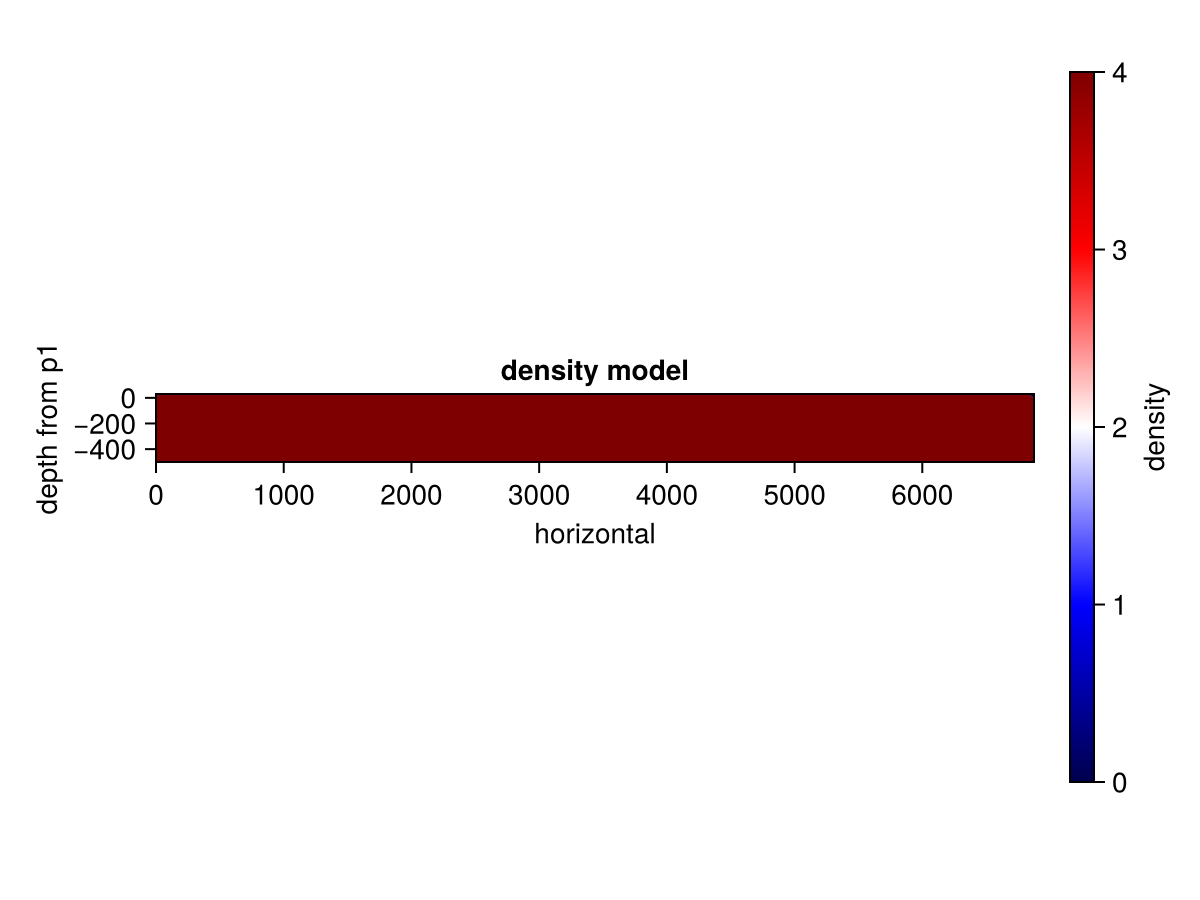

In [8]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.Vph;
    colormap = :seismic,
    colorrange=(0,4),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "density model")
)
Colorbar(fig[1,2], hm, label="density")
fig

# let's try with mount fuji

In [12]:
# two (extreme) points that can define the slice (or the x-y local plane for 3D box)
p1 = GeoPoint(35.637254,138.359012) # 
p2 = GeoPoint(35.156742,139.061570)

Δx = 250.0 # in metre
Δz = 250.0

altMax = 10.e3 # in metre
altMin = -100.e3 # in metre

-100000.0

In [13]:
allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δz,altMin,altMax)

(GeoPoint[GeoPoint(35.64397804603907, 138.35337678231807, -99995.97867183501, [-3.816884390318894e6, 3.394346733763998e6, 3.6378890676773186e6], 6.270919634854245e6) GeoPoint(35.64396096830439, 138.353391095119, -99745.98888518517, [-3.8170378596626436e6, 3.3944815061013107e6, 3.6380332327827504e6], 6.271169629358905e6) … GeoPoint(35.63660969177914, 138.35955195545523, 9749.614669392065, [-3.884257432224999e6, 3.4535117898444724e6, 3.701177548961929e6], 6.38066726380006e6) GeoPoint(35.63659319696885, 138.35956577870556, 9999.604804614906, [-3.8844109015687485e6, 3.4536465621817857e6, 3.701321714067361e6], 6.380917258492133e6); GeoPoint(35.6425168936274, 138.35553540201437, -99998.14643835822, [-3.817080440246415e6, 3.394263549475211e6, 3.637758129523909e6], 6.270917982203651e6) GeoPoint(35.642499874001864, 138.3555496282504, -99748.15656527848, [-3.817233909590164e6, 3.3943983218125245e6, 3.6379022946293415e6], 6.271167976774192e6) … GeoPoint(35.63517361262825, 138.3616732291103, 9747.

In [14]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,1.0)
Nx,Nz=size(allGridsInCartesian)


┌ Info: File /Users/nobuaki/Documents/Github/flexibleDSM/data/topoViaGMT/topoViaGMT_ffba58ee.jld2 does not exist. Producing it now...
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:106
┌ Warning: The Git repository ('/Users/nobuaki/Documents/Github/flexibleDSM') is dirty! Appending -dirty to the commit ID.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_tools.jl:71
┌ Info: File /Users/nobuaki/Documents/Github/flexibleDSM/data/topoViaGMT/topoViaGMT_ffba58ee.jld2 saved.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:115


(333, 441)

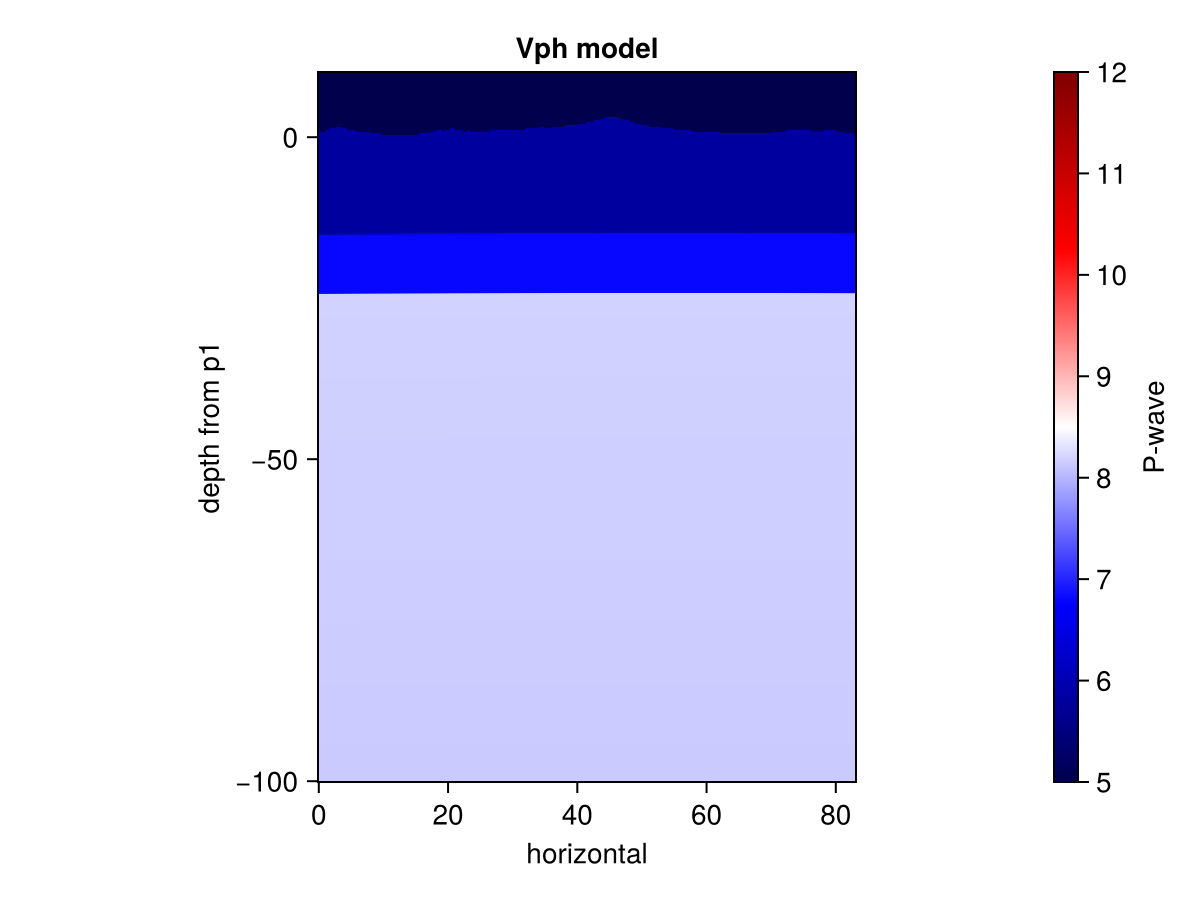

In [15]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.Vph;
    colormap = :seismic,
    colorrange=(5,12),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "Vph model")
)
Colorbar(fig[1,2], hm, label="P-wave")
fig

# Let's go to Mars

In [ ]:
set_default_planet!(:Mars)


Ellipsoid(Mars)

# ok i need to change how to call 1D planet models too (because it is already called by DSM1D and it is not very much flexible but here I just use the same params as Earth)

In [34]:
p1 = GeoPoint(15.0,135.0) # we should see Elysium planitia at least
p2 = GeoPoint(15.0,180.0) # 

GeoPoint(15.0, 180.0, 0.0, [-3.281768413646896e6, 0.0, 869020.2487787417], 3.3948785123473755e6)

In [35]:
Δx = 3.e3 # in metre
Δy = 3.e3
Δz = 3.e3

horizontalDepthMin = -1000.e3
horizontalDepthMax = 1000.e3


altMax = 100.e3 # in metre
altMin = -600.e3 # in metre



-600000.0

In [37]:
allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δy,Δz,horizontalDepthMin,horizontalDepthMax,altMin,altMax)

(GeoPoint[GeoPoint(-4.963653321425992, 132.80185665942892, -379373.71227101434, [-2.0422418899470621e6, 2.2052772739627166e6, -257588.98781908385], 3.0166789485718627e6) GeoPoint(-4.909597180901, 132.79527125283124, -380370.0400157871, [-2.041478231301609e6, 2.204960956194747e6, -254705.1070062049], 3.015685805709315e6) … GeoPoint(33.761713917581346, 127.56589367035907, -375066.6186233803, [-1.534408890720767e6, 1.99492595826258e6, 1.660191752745397e6], 3.0150251870849505e6) GeoPoint(33.81509473819276, 127.55650097800321, -374058.11040834157, [-1.5336452320753138e6, 1.9946096404946097e6, 1.6630756335582756e6], 3.0160165581038576e6); GeoPoint(-4.9657392787162955, 132.85383473591983, -380621.2905938573, [-2.0433899402441573e6, 2.202505635365183e6, -257588.98781908385], 3.015431247492151e6) GeoPoint(-4.911661691140075, 132.8472595811561, -381618.03198251064, [-2.0426262815987044e6, 2.2021893175972127e6, -254705.1070062049], 3.014437693559459e6) … GeoPoint(33.777597418131904, 127.625114830

In [38]:
Nx,Ny,Nz=size(allGridsInCartesian)

(838, 667, 234)

In [53]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,2.0)

┌ Info: File /Users/nobuaki/Documents/Github/flexibleDSM/data/topoViaGMT/topoViaGMT_aba5258d.jld2 does not exist. Producing it now...
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:106
grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]

grdblend [NOTICE]: MOLA Mars Relief at 01x01 arc minutes reduced by Gaussian Cartesian filtering (2.8 km fullwidth) [Neumann et al., 2003].
grdblend [NOTICE]:   -> Download 30x30 degree grid tile (mars_relief_01m_g): S90W180
grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]

grdblend [NOTICE]: SRTM15 Earth Relief v2.7 at 01x01 arc minutes reduced by Gaussian Cartesian filtering (5.2 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 30x30 degree grid tile (earth_relief_01m_g): S30W180
┌ Warning: The Git repository ('/Users/nobuaki/Documents/Github/flexibleDSM') is dirty! Appending -dirty

(ρ = [4.406697360843551 4.407854689199029 … 4.402448343512155 4.401274570985653; 4.408147069120241 4.4093043208026135 … 4.403898538321011 4.402724504890485; … ; 4.408512329862256 4.409669387143101 … 4.4042636616631 4.403089822183631; 4.4070633450713235 4.4082207943201315 … 4.402814507110871 4.401640612351664;;; 4.403744625372664 4.404901968631146 … 4.399487554627078 4.398313483289212; 4.405194366020408 4.406352014259202 … 4.400938008553518 4.399763712113078; … ; 4.405559634759325 4.406717087968948 … 4.4013033040159035 4.400129038441853; 4.404110617867798 4.405268081817767 … 4.399853727331835 4.398679792389989;;; 4.400787672237271 4.4019453261151575 … 4.396522830047267 4.395348327670285; 4.4022377414323905 4.403395578837358 … 4.397973321941846 4.3967989840735875; … ; 4.4026030187429415 4.4037608722360195 … 4.3983387795686815 4.39716432001072; 4.401153967471675 4.402311447943253 … 4.396889012432012 4.395714706327724;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.

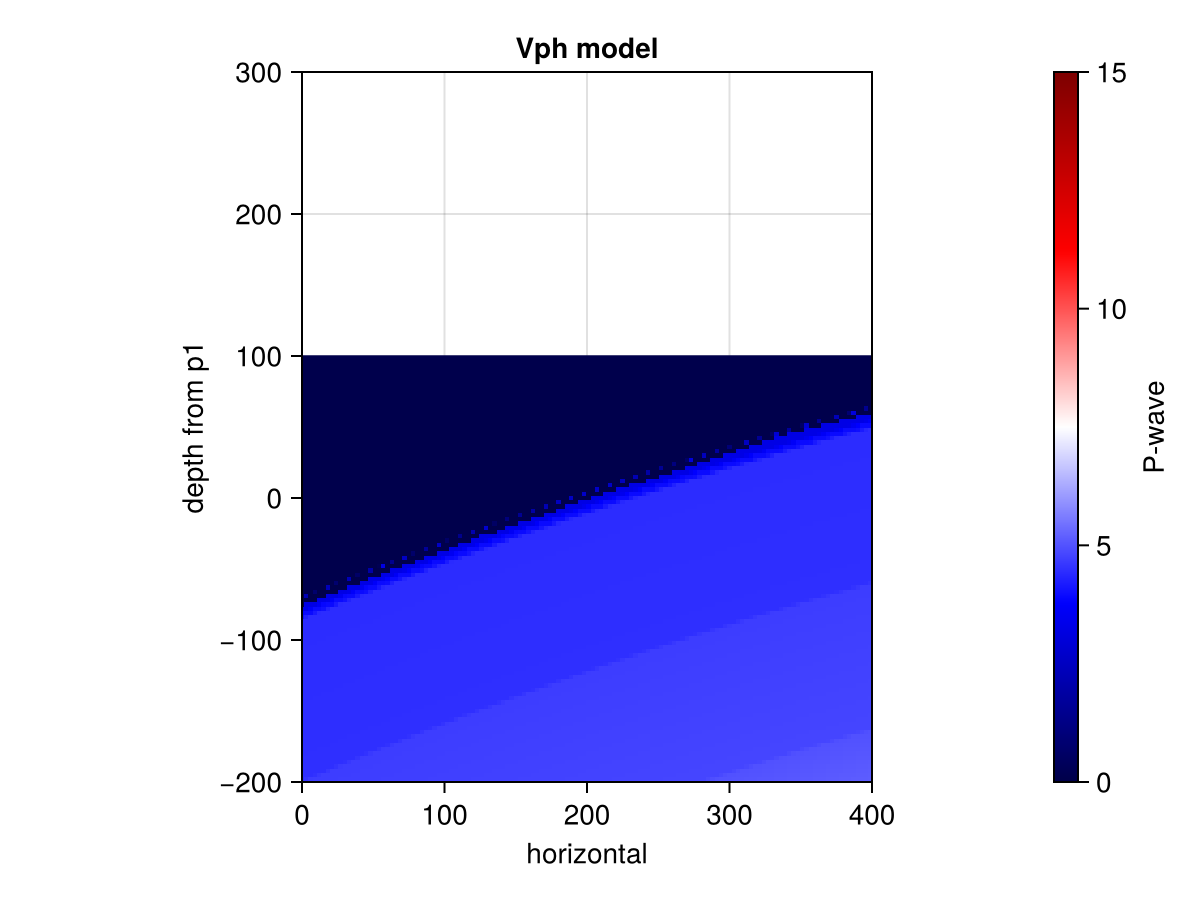

In [63]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.Vsv[:,(Ny÷6)*1,:];
    colormap = :seismic,
    colorrange=(0,15),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "Vph model")
)
ylims!(ax,-200,300)
xlims!(ax,0,400)
Colorbar(fig[1,2], hm, label="P-wave")
fig

# Hesaneh, please look at the boundary (for Mt Fuji case) if this strange bubbles happening. 
Maybe the topo Interpolator is doing something nasty!